# VaR (Value At Risk) Variance Covariance Method - Sandeep Kanao

### Importing Libraries


In [3]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

# Statistical calculation
from scipy.stats import norm

# Data fetching
import fix_yahoo_finance as yf

# Tabular data output
from tabulate import tabulate 

### Import data and calculate daily returns



In [4]:
df = yf.download('IBM', '2015-01-01','2018-01-31') 
df = df[['Close']]
df['returns'] = df.Close.pct_change()

[*********************100%***********************]  1 of 1 downloaded


### Calculate Value-at-Risk - Sandeep Kanao

c:\users\sumed\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
c:\users\sumed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


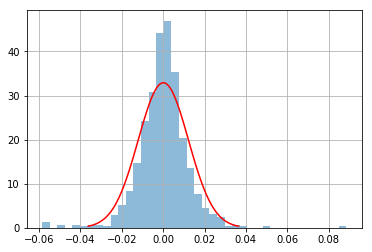

In [5]:
mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])    

df['returns'].hist(bins=40, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x,mlab.normpdf(x, mean, std_dev),"r")
plt.show()

In [7]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

print (tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0154494
95%                      -0.0198537
99%                      -0.0281153


## Historical Simulation Method

### Import data and calculating daily returns

[*********************100%***********************]  1 of 1 downloaded


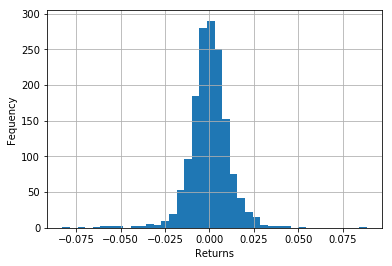

In [8]:
df = yf.download('IBM', '2012-01-01','2018-01-31') 
df = df[['Close']]
df['returns'] = df.Close.pct_change()
df = df.dropna()
plt.hist(df.returns, bins=40)
plt.xlabel('Returns')
df.sort_values('returns', inplace= True, ascending = True)
plt.ylabel('Fequency')
plt.grid(True)
plt.show()

### Sort the returns

In [9]:
df.sort_values('returns', inplace= True, ascending = True)

### Calculate Value-at-Risk -Sandeep Kanao

In [11]:
VaR_90= df['returns'].quantile(0.1)
VaR_95= df['returns'].quantile(0.05)
VaR_99= df['returns'].quantile(0.01)

print (tabulate([['90%', VaR_90], ['95%', VaR_95], ["99%", VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level      Value at Risk
------------------  ---------------
90%                      -0.0119997
95%                      -0.0167113
99%                      -0.0352697
